In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [65]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/crab/Crab_dataset_growth.csv')
data.head()


,No. of crab,Carapace Width Before (cm),Carapace Width After (cm),Size of Increment (cm),Body Weight Before (g),Body Weight After (g),Size of Increment (g)
0,1,7.71,8.91,1.20,103.7,110.5,6.8
1,2,6.81,7.49,0.68,62.5,69.8,7.3
2,3,7.11,8.02,0.91,79.1,88.3,9.2
3,4,7.61,8.65,1.04,78.5,86.7,8.2
4,5,6.74,7.35,0.61,60.3,68.7,8.4


In [66]:
import pandas as pd

column_to_delete = ['No. of crab']
data = data.drop(column_to_delete, axis=1)

output_file_path = '/content/drive/MyDrive/crab/Crab_dataset_growth33.csv'
data.to_csv(output_file_path, index=False)

In [67]:
data = pd.read_csv('/content/drive/MyDrive/crab/Crab_dataset_growth33.csv')
data.head()

,Carapace Width Before (cm),Carapace Width After (cm),Size of Increment (cm),Body Weight Before (g),Body Weight After (g),Size of Increment (g)
0,7.71,8.91,1.20,103.7,110.5,6.8
1,6.81,7.49,0.68,62.5,69.8,7.3
2,7.11,8.02,0.91,79.1,88.3,9.2
3,7.61,8.65,1.04,78.5,86.7,8.2
4,6.74,7.35,0.61,60.3,68.7,8.4


In [68]:
X = data.drop(['Size of Increment (g)'], axis=1)
y = data['Size of Increment (g)']

# Display the modified feature dataset
print(X)

# Display the target dataset
print(y)



     Carapace Width Before (cm)  Carapace Width After (cm)  \
0                          7.71                       8.91   
1                          6.81                       7.49   
2                          7.11                       8.02   
3                          7.61                       8.65   
4                          6.74                       7.35   
..                          ...                        ...   
130                        7.62                       8.55   
131                        8.90                       9.90   
132                        8.35                       9.44   
133                        7.43                       8.82   
134                        8.67                      10.17   

     Size of Increment (cm)  Body Weight Before (g)  Body Weight After (g)  
0                      1.20                   103.7                  110.5  
1                      0.68                    62.5                   69.8  
2                      0

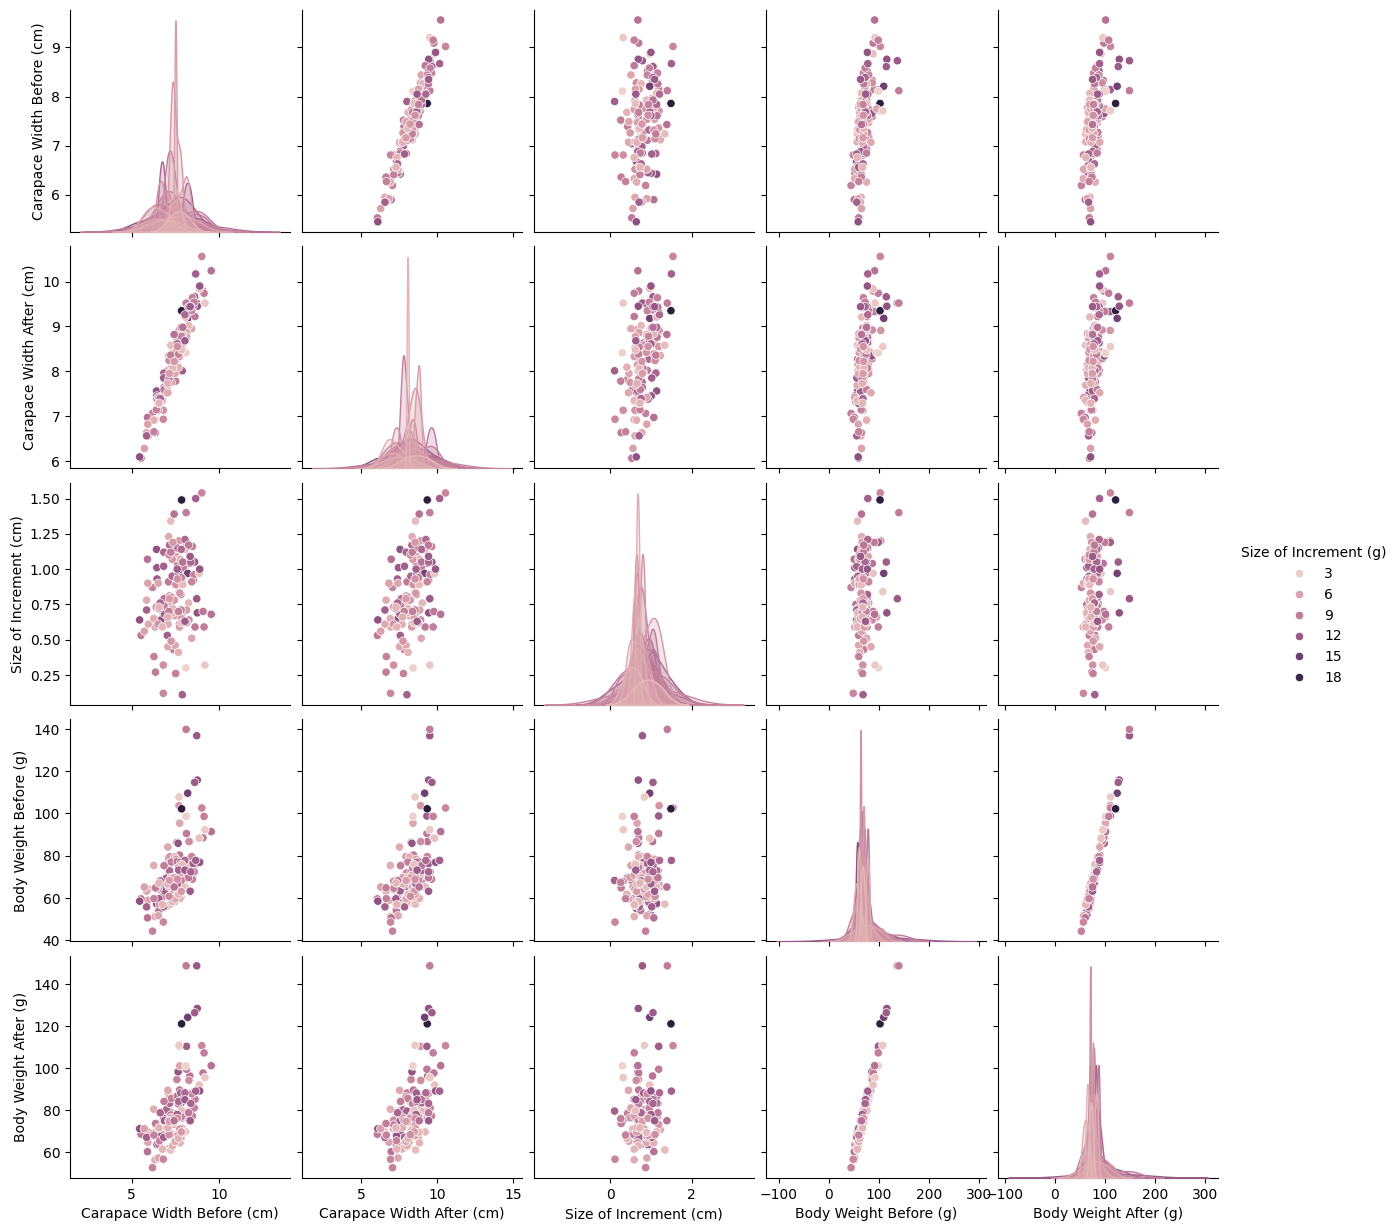

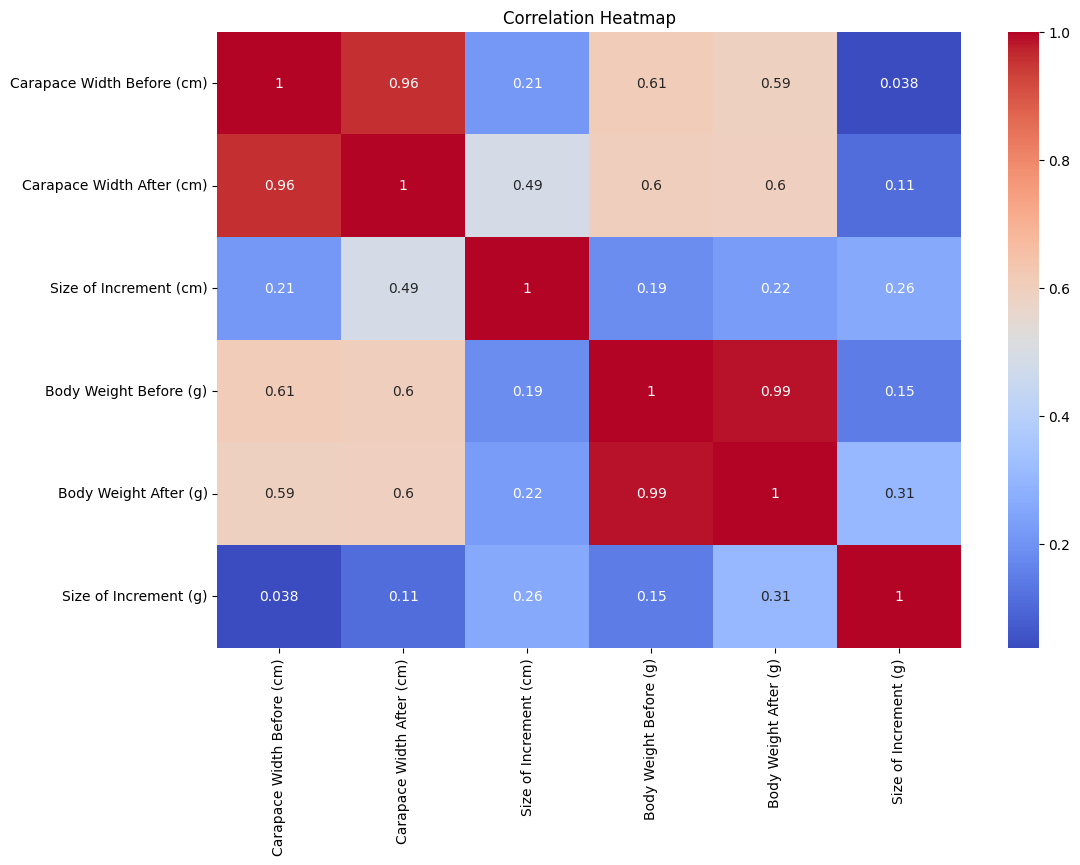

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font family to a font available on your system
plt.rcParams['font.family'] = 'sans-serif'

# Let's explore the dataset by visualizing the distributions and relationships between variables
sns.pairplot(data, hue='Size of Increment (g)')
plt.show()

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [70]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [71]:
!pip install shap


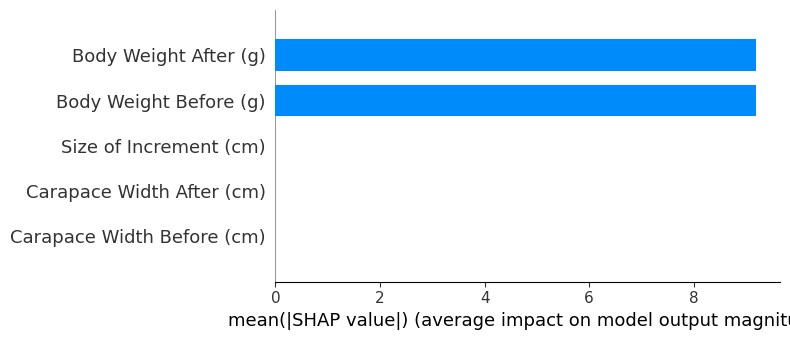

In [72]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

# Assuming you have mounted your drive and loaded your data as X and y

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a LassoCV model
model = LassoCV()
model.fit(X_train, y_train)

# Use SHAP to explain the model's predictions
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_val)

# Visualize the SHAP values using a bar plot
shap.summary_plot(shap_values, X_val, plot_type="bar")

plt.show()


**Beeswarm**

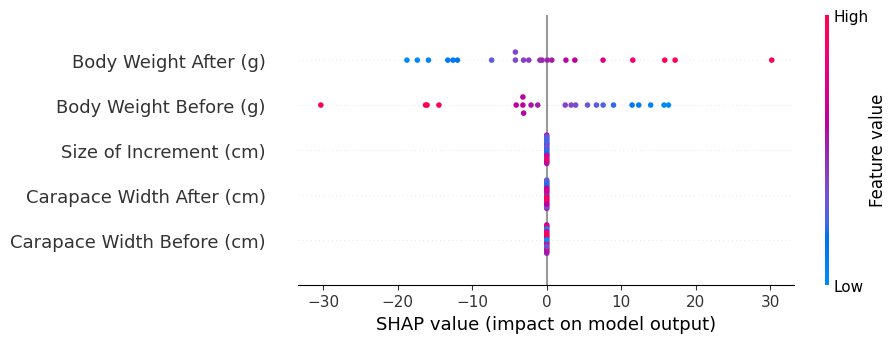

In [73]:
shap.plots.beeswarm(shap_values)

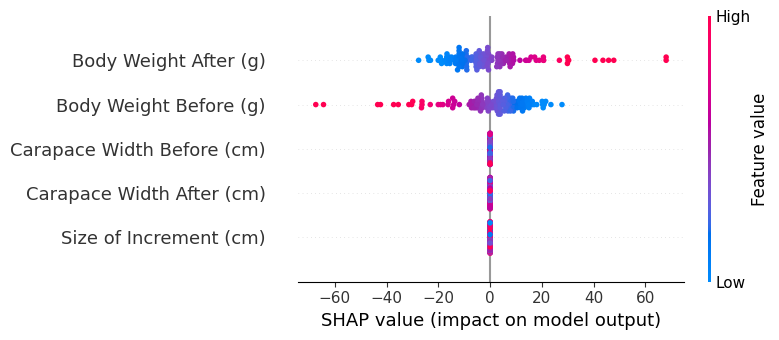

In [74]:
import shap

# Assuming your model and X are already defined and your model is trained.
# model = LassoCV().fit(X_train, y_train)

# Create a wrapper function that takes an input and returns model predictions
def predict_wrapper(X):
    return model.predict(X)

# Use the wrapper function with SHAP Explainer
explainer = shap.Explainer(predict_wrapper, X_train)  # Assuming X_train is your background dataset
shap_values = explainer(X)

# Now you can proceed with your analysis, for example, by visualizing the SHAP values
shap.summary_plot(shap_values, X)


**Waterfall**

In [75]:
np.shape(shap_values.values)

(135, 5)

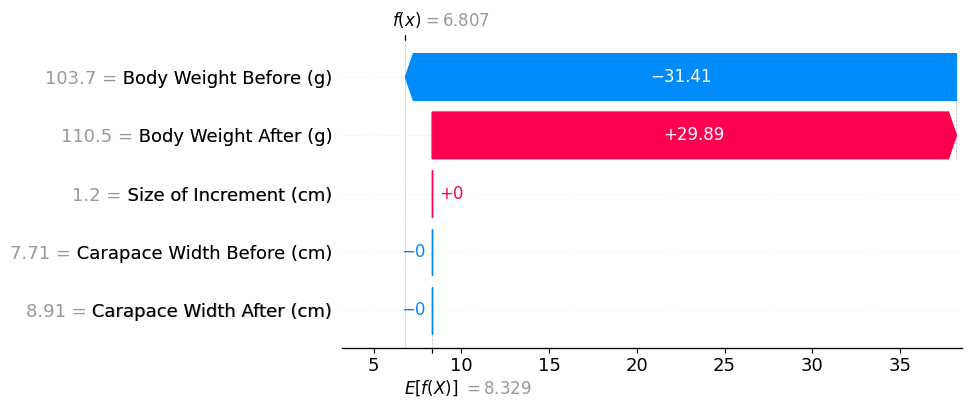

In [76]:
shap.plots.waterfall(shap_values[0])

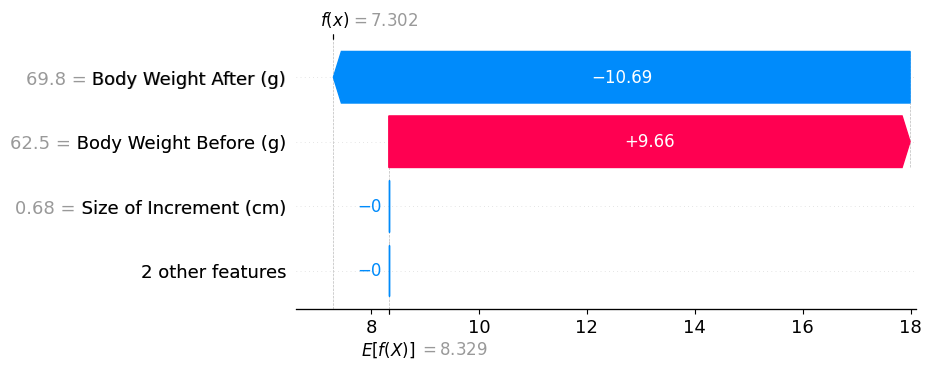

In [77]:
shap.plots.waterfall(shap_values[1], max_display=4)

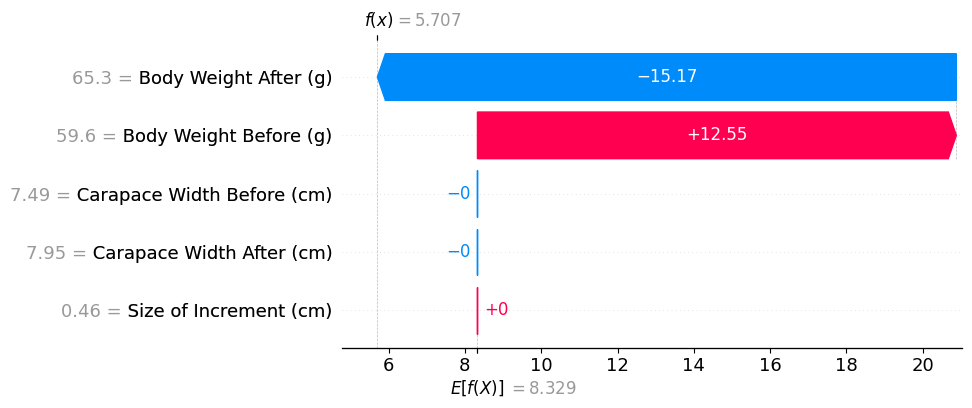

In [85]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

# Assuming you have your dataset loaded as X and y
# For demonstration, I'll create a simple dataset
np.random.seed(0)  # For reproducibility
X = np.random.rand(100, 5)
y = X @ np.array([1.5, -2., 0., 0.5, 3.]) + np.random.randn(100) * 0.5

# Initialize and train LassoCV
model = LassoCV()
model.fit(X_train, y_train)

# Initialize a SHAP explainer using the model and the training set
explainer = shap.Explainer(model.predict, X_train)

# Calculate SHAP values for a single prediction from the test set
# Here we are using the first instance in the test set as an example
shap_values = explainer(X_test[:1])

# Plot the SHAP waterfall plot for the first prediction
shap.plots.waterfall(shap_values[0])

plt.show()


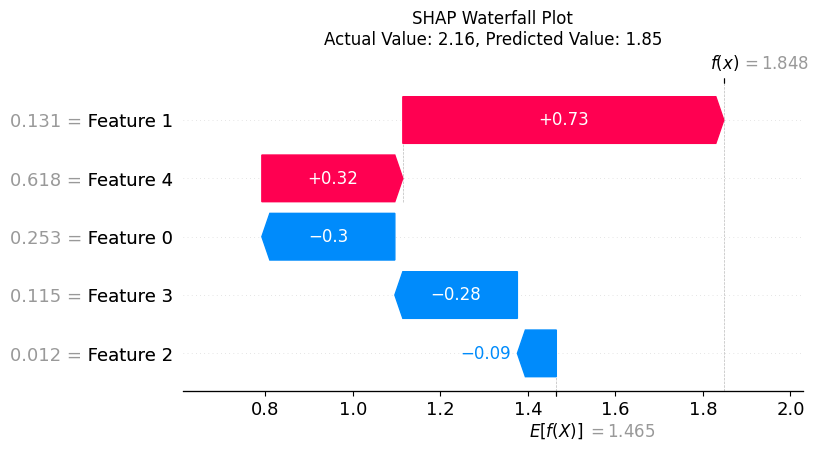

In [91]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

# Assuming you have your dataset loaded as X and y
# For demonstration, I'll create a simple dataset
np.random.seed(0)  # For reproducibility
X = np.random.rand(100, 5)
y = X @ np.array([1.5, -2., 0., 0.5, 3.]) + np.random.randn(100) * 0.5



# Initialize and train LassoCV
model = LassoCV()
model.fit(X_train, y_train)

# Initialize a SHAP explainer using the model and the training set
explainer = shap.Explainer(model.predict, X_train)

# Check if the test set is not empty
if X_test.size != 0:
    # Calculate SHAP values for a single prediction from the test set
    # Here we are using the first instance in the test set as an example
    shap_values = explainer(X_test[:1])

    # Plot the SHAP waterfall plot for the first prediction
    shap.plots.waterfall(shap_values[0], show=False)

    # Customize the plot title to include actual and predicted values
    actual_value = y_test[0]
    predicted_value = model.predict(X_test[:1])[0]
    plt.title(f"SHAP Waterfall Plot\nActual Value: {actual_value:.2f}, Predicted Value: {predicted_value:.2f}")

    plt.show()
else:
    print("Test set is empty. Cannot generate SHAP plot.")


**Force plot**

In [92]:
import shap

# Assuming you have computed SHAP values and stored them in shap_values

# Run initjs() to initialize the JavaScript library
shap.initjs()

# Generate the force plot
shap.plots.force(shap_values[0])


In [93]:
import shap

# Assuming you have computed SHAP values and stored them in shap_values

# Run initjs() to initialize the JavaScript library
shap.initjs()

# Generate the force plot

shap.plots.force(shap_values[0:100])

**Stacked Force Plot**

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
import shap

# Fetching the Boston housing dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Train LassoCV model
model = LassoCV(cv=5)
model.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Initialize JavaScript (required for visualization)
shap.initjs()

# Plot SHAP stacked force plot
shap.plots.force(shap_values[:100])


**Absolute Mean Shap**

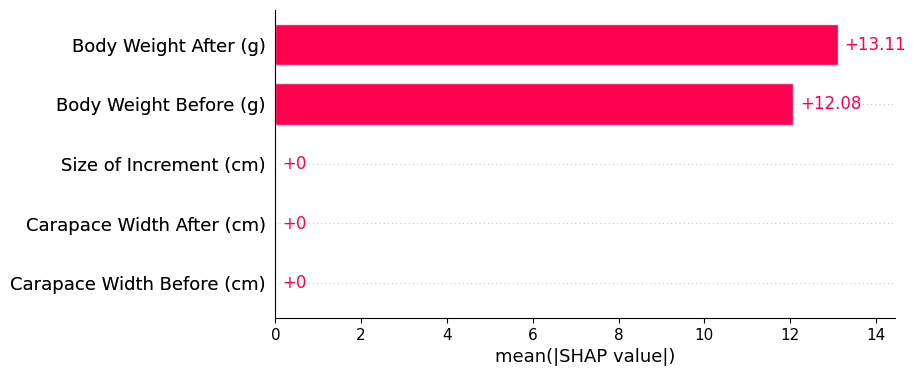

In [82]:
shap.plots.bar(shap_values)